##1

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

def build_image_model():
    (x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
    x_train, x_test = x_train / 255.0, x_test / 255.0
    x_train = x_train.reshape(-1, 28, 28, 1)
    x_test = x_test.reshape(-1, 28, 28, 1)

    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))
    return model

model = build_image_model()

def build_tabular_model():
    data = {
        'size': [500, 1000, 1500, 2000, 2500],
        'bedrooms': [1, 2, 3, 4, 5],
        'age': [5, 10, 15, 20, 25],
        'price': [150000, 250000, 350000, 450000, 550000]
    }
    df = pd.DataFrame(data)
    X = df.drop('price', axis=1)
    y = df['price']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    model = models.Sequential([
        layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
        layers.Dense(32, activation='relu'),
        layers.Dense(1)
    ])

    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))
    return model

model = build_tabular_model()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 41ms/step - accuracy: 0.9003 - loss: 0.3287 - val_accuracy: 0.9818 - val_loss: 0.0586
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 68s 34ms/step - accuracy: 0.9844 - loss: 0.0525 - val_accuracy: 0.9895 - val_loss: 0.0316
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 52s 27ms/step - accuracy: 0.9896 - loss: 0.0321 - val_accuracy: 0.9896 - val_loss: 0.0295
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 28ms/step - accuracy: 0.9924 - loss: 0.0231 - val_accuracy: 0.9846 - val_loss: 0.0433
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 27ms/step - accuracy: 0.9947 - loss: 0.0169 - val_accuracy: 0.9898 - val_loss: 0.0344
Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 965ms/step - loss: 162500100096.0000 - val_loss: 62500061184.0000
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step - loss: 162500083712.0000 - val_loss: 62500048896.0000
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 162500034560.0000 - val_loss: 62500032512.0000
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 162500018176.0000 - val_loss: 62500007936.0000
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 162500001792.0000 - val_loss: 62499991552.0000
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 162499969024.0000 - val_loss: 62499975168.0000
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 162499952640.0000 - val_loss: 62499962880.0000
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 162499919872.0000 - val_loss: 62499938304.0000
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 162499919872.0000 - val_loss: 62499921920.0000
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 162499

##2

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist, imdb
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.sequence import pad_sequences

def mnist_classification():
    (train_images, train_labels), (test_images, test_labels) = mnist.load_data()
    train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
    test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255
    train_labels = to_categorical(train_labels)
    test_labels = to_categorical(test_labels)

    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    model.fit(train_images, train_labels, epochs=5, batch_size=64)
    test_loss, test_acc = model.evaluate(test_images, test_labels)
    print(f'MNIST Test Accuracy: {test_acc}')

def imdb_classification():
    max_features = 10000
    maxlen = 500
    (train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=max_features)
    train_data = pad_sequences(train_data, maxlen=maxlen)
    test_data = pad_sequences(test_data, maxlen=maxlen)

    model = models.Sequential([
        layers.Embedding(max_features, 128, input_length=maxlen),
        layers.Conv1D(32, 7, activation='relu'),
        layers.MaxPooling1D(5),
        layers.Conv1D(32, 7, activation='relu'),
        layers.GlobalMaxPooling1D(),
        layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    model.fit(train_data, train_labels, epochs=5, batch_size=128)
    test_loss, test_acc = model.evaluate(test_data, test_labels)
    print(f'IMDB Test Accuracy: {test_acc}')

if __name__ == "__main__":
    print("Running MNIST Classification:")
    mnist_classification()
    print("\nRunning IMDB Classification:")
    imdb_classification()


Running MNIST Classification:


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 48s 49ms/step - accuracy: 0.8758 - loss: 0.4173
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 47s 50ms/step - accuracy: 0.9822 - loss: 0.0540
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 49s 52ms/step - accuracy: 0.9884 - loss: 0.0371
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 77s 47ms/step - accuracy: 0.9918 - loss: 0.0254
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 81s 46ms/step - accuracy: 0.9936 - loss: 0.0207
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9852 - loss: 0.0420
MNIST Test Accuracy: 0.9894999861717224

Running IMDB Classification:
17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


196/196 ━━━━━━━━━━━━━━━━━━━━ 74s 371ms/step - accuracy: 0.6239 - loss: 0.6052
Epoch 2/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 82s 370ms/step - accuracy: 0.9075 - loss: 0.2403
Epoch 3/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 80s 361ms/step - accuracy: 0.9518 - loss: 0.1411
Epoch 4/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 83s 367ms/step - accuracy: 0.9790 - loss: 0.0737
Epoch 5/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 88s 397ms/step - accuracy: 0.9941 - loss: 0.0304
782/782 ━━━━━━━━━━━━━━━━━━━━ 17s 22ms/step - accuracy: 0.8596 - loss: 0.5166
IMDB Test Accuracy: 0.8591200113296509


##3

Training CNN from Scratch on CIFAR-10:
170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 62s 39ms/step - accuracy: 0.3329 - loss: 1.7816 - val_accuracy: 0.5348 - val_loss: 1.2907
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 61s 39ms/step - accuracy: 0.5715 - loss: 1.2132 - val_accuracy: 0.6156 - val_loss: 1.0789
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 60s 38ms/step - accuracy: 0.6255 - loss: 1.0604 - val_accuracy: 0.6371 - val_loss: 1.0168
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 84s 40ms/step - accuracy: 0.6588 - loss: 0.9675 - val_accuracy: 0.6587 - val_loss: 0.9825
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 79s 38ms/step - accuracy: 0.6892 - loss: 0.8821 - val_accuracy: 0.6715 - val_loss: 0.9367
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 63s 40ms/step - accuracy: 0.7099 - loss: 0.8242 - val_accuracy: 0.6851 - val_loss: 0.9130
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 59s 37ms/step - accuracy: 0.7221 - loss: 0.7861 - val_accuracy: 0.6866 - v

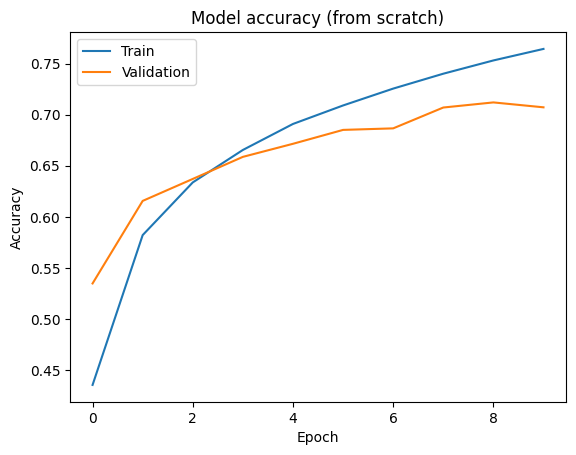

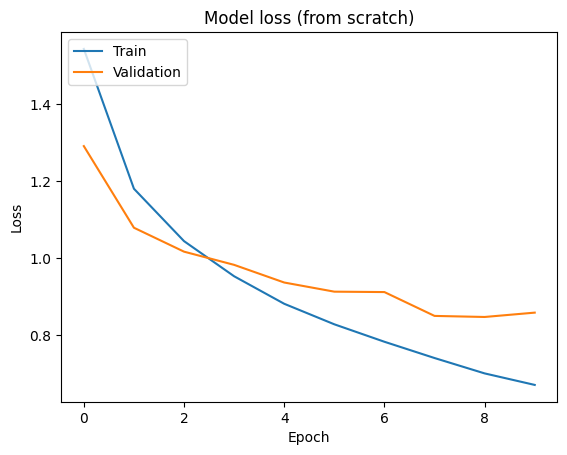


Fine-tuning VGG16 on CIFAR-10:
58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 1, 1, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,781,642 (56.39 MB)

 Trainable params: 66,954 (261.54 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

Epoch 1/10
1001/1563 ━━━━━━━━━━━━━━━━━━━━ 3:10 340ms/step - accuracy: 0.4402 - loss: 1.6214

KeyboardInterrupt: 

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import VGG16
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

def cnn_from_scratch():
    (train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
    train_images, test_images = train_images / 255.0, test_images / 255.0
    train_labels = to_categorical(train_labels)
    test_labels = to_categorical(test_labels)

    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

    test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
    print(f"Test accuracy (from scratch): {test_acc:.4f}")

    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy (from scratch)')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss (from scratch)')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

def vgg16_fine_tuning():
    (train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
    train_images, test_images = train_images / 255.0, test_images / 255.0
    train_labels = to_categorical(train_labels)
    test_labels = to_categorical(test_labels)

    vgg_base = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
    vgg_base.trainable = False

    model = models.Sequential([
        vgg_base,
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    model.summary()

    history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

    test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
    print(f"Test accuracy (VGG16 fine-tuned): {test_acc:.4f}")

    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy (VGG16 fine-tuned)')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss (VGG16 fine-tuned)')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

if __name__ == "__main__":
    print("Training CNN from Scratch on CIFAR-10:")
    cnn_from_scratch()

    print("\nFine-tuning VGG16 on CIFAR-10:")
    vgg16_fine_tuning()

Training CNN from Scratch on CIFAR-10:
Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 67s 42ms/step - accuracy: 0.3514 - loss: 1.7588 - val_accuracy: 0.5561 - val_loss: 1.2286
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 63s 40ms/step - accuracy: 0.5818 - loss: 1.1763 - val_accuracy: 0.6209 - val_loss: 1.0939
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 39ms/step - accuracy: 0.6432 - loss: 1.0150 - val_accuracy: 0.6676 - val_loss: 0.9645
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 39ms/step - accuracy: 0.6763 - loss: 0.9167 - val_accuracy: 0.6771 - val_loss: 0.9432
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 84s 40ms/step - accuracy: 0.7046 - loss: 0.8430 - val_accuracy: 0.6955 - val_loss: 0.8893
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 60s 38ms/step - accuracy: 0.7277 - loss: 0.7777 - val_accuracy: 0.7052 - val_loss: 0.8590
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 62s 39ms/step - accuracy: 0.7476 - loss: 0.7201 - val_accuracy: 0.6944 - val_loss: 0.9022
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━

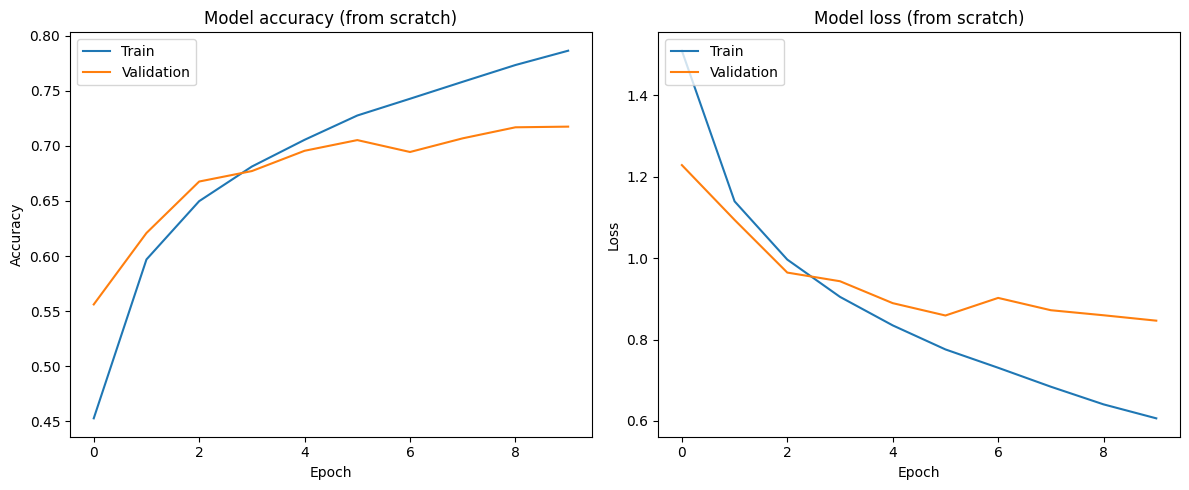


Fine-tuning VGG16 on CIFAR-10:


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 1, 1, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,781,642 (56.39 MB)

 Trainable params: 66,954 (261.54 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 676s 432ms/step - accuracy: 0.4669 - loss: 1.5296 - val_accuracy: 0.5510 - val_loss: 1.2746
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 628s 397ms/step - accuracy: 0.5808 - loss: 1.1994 - val_accuracy: 0.5844 - val_loss: 1.1859
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 758s 484ms/step - accuracy: 0.6041 - loss: 1.1268 - val_accuracy: 0.6020 - val_loss: 1.1539
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 716s 429ms/step - accuracy: 0.6179 - loss: 1.0998 - val_accuracy: 0.5942 - val_loss: 1.1577
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 633s 398ms/step - accuracy: 0.6350 - loss: 1.0469 - val_accuracy: 0.6030 - val_loss: 1.1426
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 654s 419ms/step - accuracy: 0.6440 - loss: 1.0190 - val_accuracy: 0.6088 - val_loss: 1.1295
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 788s 486ms/step - accuracy: 0.6473 - loss: 1.0033 - val_accuracy: 0.6059 - val_loss: 1.1359
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 777s 470ms/step - ac

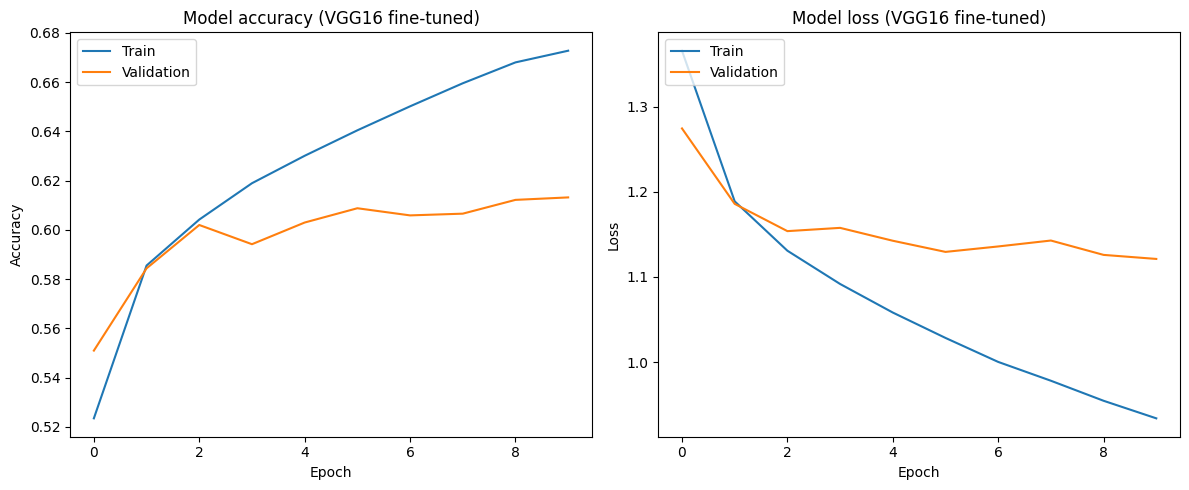

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import VGG16
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

def cnn_from_scratch():
    (train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
    train_images, test_images = train_images / 255.0, test_images / 255.0  # Normalize
    train_labels = to_categorical(train_labels)
    test_labels = to_categorical(test_labels)

    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

    test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
    print(f"Test accuracy (from scratch): {test_acc:.4f}")

    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy (from scratch)')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss (from scratch)')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.tight_layout()
    plt.show()

def vgg16_fine_tuning():
    (train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
    train_images, test_images = train_images / 255.0, test_images / 255.0  # Normalize
    train_labels = to_categorical(train_labels)
    test_labels = to_categorical(test_labels)

    vgg_base = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
    vgg_base.trainable = False

    model = models.Sequential([
        vgg_base,
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    model.summary()

    history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

    test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
    print(f"Test accuracy (VGG16 fine-tuned): {test_acc:.4f}")

    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy (VGG16 fine-tuned)')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss (VGG16 fine-tuned)')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    print("Training CNN from Scratch on CIFAR-10:")
    cnn_from_scratch()

    print("\nFine-tuning VGG16 on CIFAR-10:")
    vgg16_fine_tuning()

##4

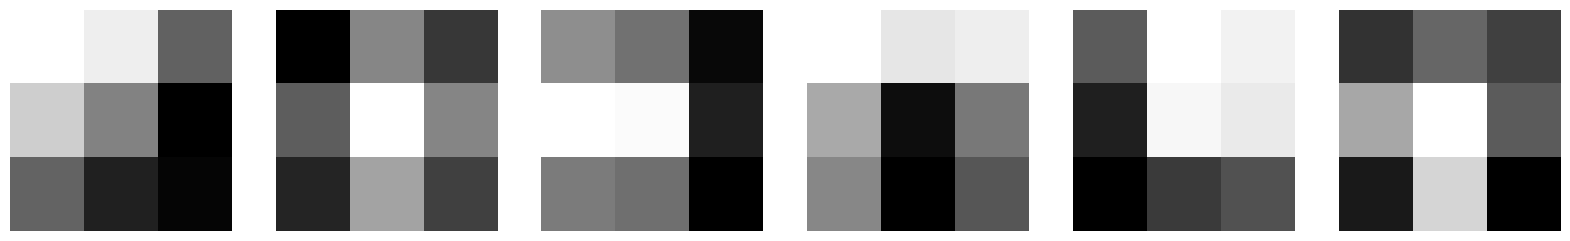

<Figure size 2000x700 with 0 Axes>

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step


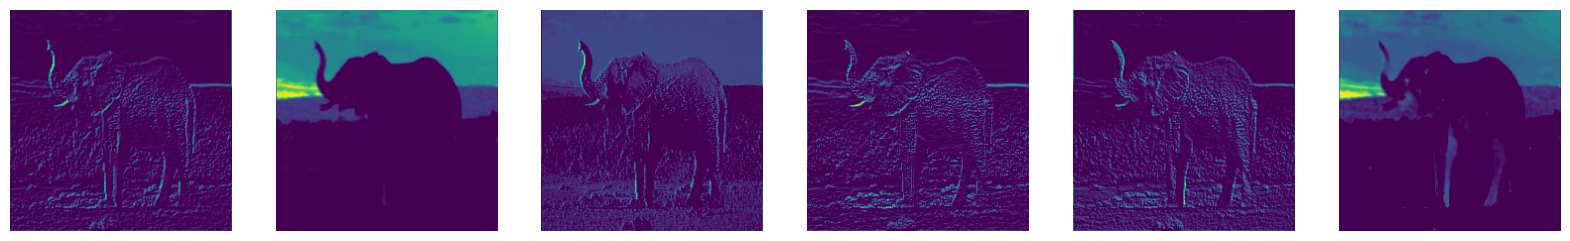

<Figure size 2000x900 with 0 Axes>

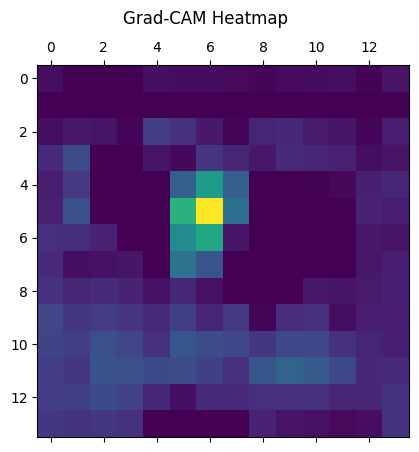

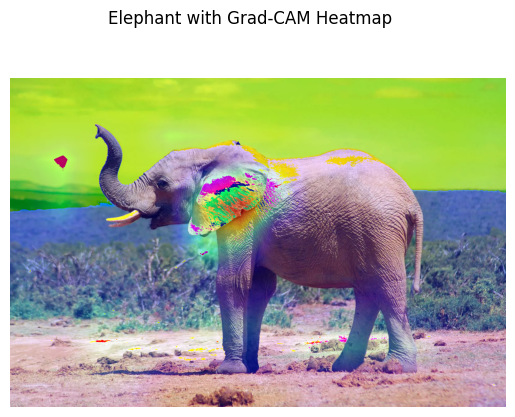

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
import cv2

model = VGG16(weights='imagenet')

img_path = '/content/Elephant.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

layer_name = 'block1_conv1'
filters, biases = model.get_layer(name=layer_name).get_weights()
filters = (filters - filters.min()) / (filters.max() - filters.min())
n_filters = 6
fig, axes = plt.subplots(1, n_filters, figsize=(20, 20))
for i in range(n_filters):
    f = filters[:, :, :, i]
    axes[i].imshow(f[:, :, 0], cmap='gray')
    axes[i].axis('off')
plt.figure(figsize=(20, 7))
plt.suptitle('ConvNet Filters')
plt.show()

layer_outputs = [layer.output for layer in model.layers[:8]]
activation_model = Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(x)
layer_names = [layer.name for layer in model.layers[:8]]
layer_idx = 1
layer_activation = activations[layer_idx]
n_filters = 6
fig, axes = plt.subplots(1, n_filters, figsize=(20, 20))
for i in range(n_filters):
    activation_map = layer_activation[0, :, :, i]
    axes[i].imshow(activation_map, cmap='viridis')
    axes[i].axis('off')
plt.figure(figsize=(20, 9))
plt.suptitle('Intermediate Activations')
plt.show()

def compute_gradcam(model, img_array, layer_name, class_idx):
    grad_model = Model([model.inputs], [model.get_layer(layer_name).output, model.output])
    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        loss = predictions[:, class_idx]
    grads = tape.gradient(loss, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    conv_outputs = conv_outputs.numpy()[0]
    pooled_grads = pooled_grads.numpy()
    for i in range(pooled_grads.shape[-1]):
        conv_outputs[:, :, i] *= pooled_grads[i]
    heatmap = np.mean(conv_outputs, axis=-1)
    heatmap = np.maximum(heatmap, 0)
    heatmap /= np.max(heatmap)

    return heatmap

heatmap = compute_gradcam(model, x, 'block5_conv3', 386)
plt.matshow(heatmap)
plt.suptitle('Grad-CAM Heatmap')
plt.show()

img = cv2.imread(img_path)
heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
heatmap = np.uint8(255 * heatmap)
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
superimposed_img = heatmap * 0.4 + img
superimposed_img = np.uint8(superimposed_img)

superimposed_img_rgb = cv2.cvtColor(superimposed_img, cv2.COLOR_BGR2RGB)
plt.imshow(superimposed_img_rgb)
plt.axis('off')
plt.suptitle('Elephant with Grad-CAM Heatmap')
plt.show()